### NAME: ALINA ANJUM
#### Batch & roll_no.: B1_02
#### AIM: Design and implement a solution for a suitable problem using Deep Learning models and techniques.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manjilkarki/deepfake-and-real-images")

print("Path to dataset files:", path)

100%|██████████| 1.68G/1.68G [00:43<00:00, 42.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Path from kagglehub
dataset_path = path


base_path = os.path.join(path, "Dataset")

In [ ]:
# List all files and folders
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}, Files: {len(files)}")


Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1, Files: 0
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset, Files: 0
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test, Files: 0
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test/Real, Files: 5413
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test/Fake, Files: 5492
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Validation, Files: 0
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Validation/Real, Files: 19787
Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Validation/Fake, Files: 19641
Directory: /root/.cache/kagglehub/datasets/manjilkarki

In [ ]:
# image folders (dataset is structured with "real" and "fake" folders)
real_dir = os.path.join(dataset_path, 'real')
fake_dir = os.path.join(dataset_path, 'fake')

In [ ]:
import os

for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:  # only first 5 files per folder
        print(f"{subindent}{f}")

1/
    Dataset/
        Test/
            Real/
                real_4649.jpg
                real_953.jpg
                real_3625.jpg
                real_4614.jpg
                real_169.jpg
            Fake/
                fake_2244.jpg
                fake_2448.jpg
                fake_3336.jpg
                fake_1056.jpg
                fake_487.jpg
        Validation/
            Real/
                real_4649.jpg
                real_8975.jpg
                real_9963.jpg
                real_7838.jpg
                real_8817.jpg
            Fake/
                fake_12106.jpg
                fake_10951.jpg
                fake_8995.jpg
                fake_13768.jpg
                fake_2244.jpg
        Train/
            Real/
                real_54072.jpg
                real_4649.jpg
                real_25355.jpg
                real_66147.jpg
                real_27154.jpg
            Fake/
                fake_68109.jpg
                fake_12106.jpg
           

In [ ]:
import os

# Show full structure of dataset
for root, dirs, files in os.walk(path):
    print(f"\n Directory: {root}")
    print(f" Subdirectories: {dirs}")
    print(f" Files: {files[:5]}")  # print only first 5 files to avoid overload



 Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1
 Subdirectories: ['Dataset']
 Files: []

 Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset
 Subdirectories: ['Test', 'Validation', 'Train']
 Files: []

 Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test
 Subdirectories: ['Real', 'Fake']
 Files: []

 Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test/Real
 Subdirectories: []
 Files: ['real_4649.jpg', 'real_953.jpg', 'real_3625.jpg', 'real_4614.jpg', 'real_169.jpg']

 Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test/Fake
 Subdirectories: []
 Files: ['fake_2244.jpg', 'fake_2448.jpg', 'fake_3336.jpg', 'fake_1056.jpg', 'fake_487.jpg']

 Directory: /root/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Validat

In [ ]:
# Count images in each category
def count_images(base_path):
    stats = {}
    for split in ["Train", "Validation", "Test"]:
        stats[split] = {}
        for label in ["Real", "Fake"]:
            folder = os.path.join(base_path, split, label)
            stats[split][label] = len(os.listdir(folder))
    return stats


In [ ]:
# Show counts
image_counts = count_images(base_path)
for split, labels in image_counts.items():
    print(f"\n {split}")
    for label, count in labels.items():
        print(f"   {label}: {count} images")


 Train
   Real: 70001 images
   Fake: 70001 images

 Validation
   Real: 19787 images
   Fake: 19641 images

 Test
   Real: 5413 images
   Fake: 5492 images


In [ ]:
# Visualize samples
def show_samples(folder, title, n=5):
    images = os.listdir(folder)[:n]
    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


 Sample Real Images (Train)


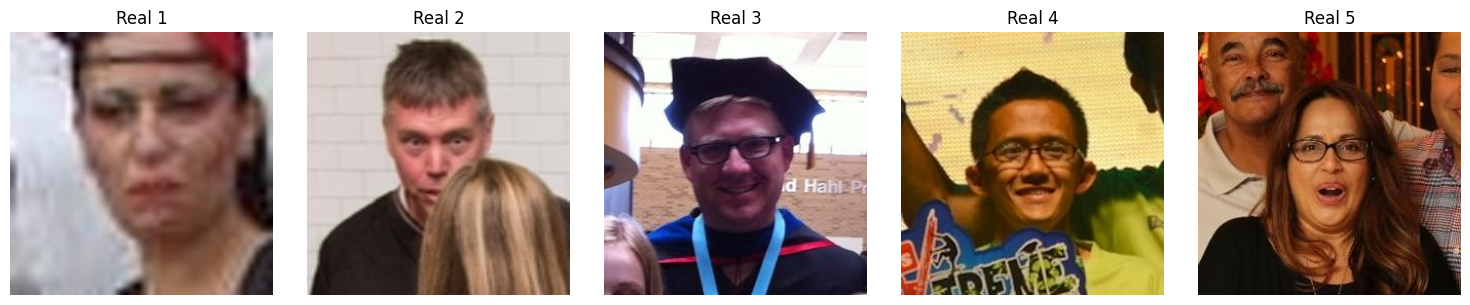

In [ ]:
print("\n Sample Real Images (Train)")
show_samples(os.path.join(base_path, "Train", "Real"), "Real")



🔍 Sample Fake Images (Train)


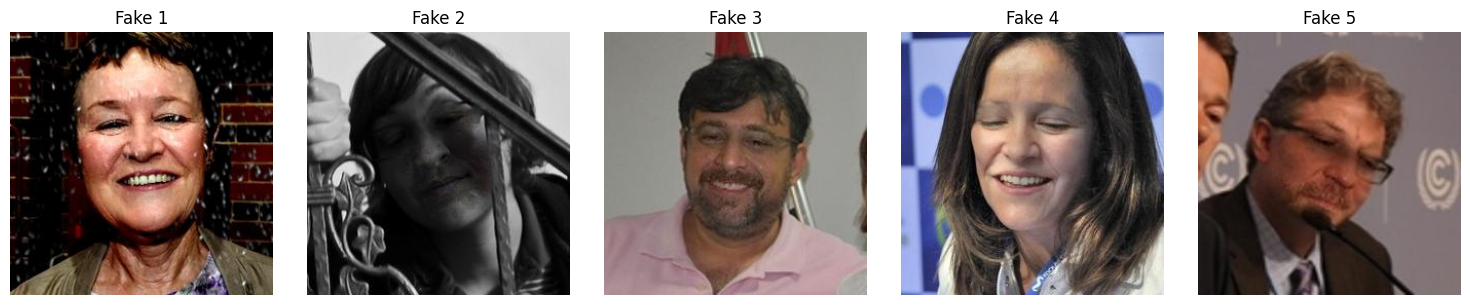

In [ ]:
print("\n🔍 Sample Fake Images (Train)")
show_samples(os.path.join(base_path, "Train", "Fake"), "Fake")

In [ ]:
# Analyze image size distribution
def image_size_stats(folder):
    widths, heights = [], []
    for img_name in os.listdir(folder)[:100]:  # Sample first 100
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        widths.append(img.width)
        heights.append(img.height)
    return widths, heights

real_folder = os.path.join(base_path, "Train", "Real")
fake_folder = os.path.join(base_path, "Train", "Fake")

real_w, real_h = image_size_stats(real_folder)
fake_w, fake_h = image_size_stats(fake_folder)

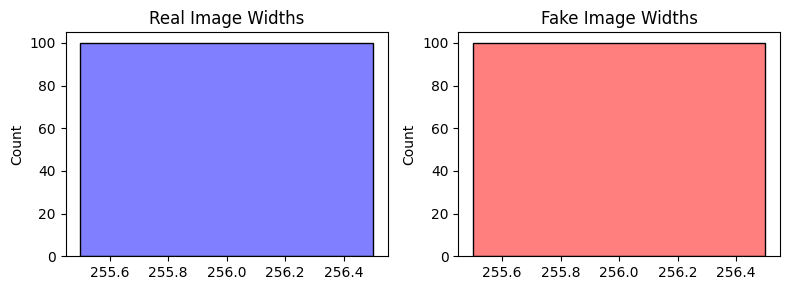

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

# Widths
sns.histplot(real_w, color='blue', kde=True, ax=axs[0])
axs[0].set_title("Real Image Widths")

sns.histplot(fake_w, color='red', kde=True, ax=axs[1])
axs[1].set_title("Fake Image Widths")

plt.tight_layout()
plt.show()


In [ ]:
# Color mode check
def check_color_modes(folder):
    modes = {}
    for img_name in os.listdir(folder)[:50]:
        img_path = os.path.join(folder, img_name)
        mode = Image.open(img_path).mode
        modes[mode] = modes.get(mode, 0) + 1
    return modes

print("\n Color Modes in Train/Real:", check_color_modes(real_folder))
print("\n Color Modes in Train/Fake:", check_color_modes(fake_folder))


 Color Modes in Train/Real: {'RGB': 50}

 Color Modes in Train/Fake: {'RGB': 50}


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Set paths
dataset_dir = os.path.join(path, "Dataset")
train_dir = os.path.join(dataset_dir, "Train")
val_dir = os.path.join(dataset_dir, "Validation")
test_dir = os.path.join(dataset_dir, "Test")

# Image size and batch
img_size = (32, 32)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

# Just rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Epoch 1/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 242s 54ms/step - accuracy: 0.6577 - loss: 0.6134 - val_accuracy: 0.7205 - val_loss: 0.5342
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 250s 52ms/step - accuracy: 0.7402 - loss: 0.5147 - val_accuracy: 0.7322 - val_loss: 0.5245
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 225s 51ms/step - accuracy: 0.7647 - loss: 0.4804 - val_accuracy: 0.7638 - val_loss: 0.4763
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 220s 50ms/step - accuracy: 0.7770 - loss: 0.4586 - val_accuracy: 0.7581 - val_loss: 0.4843
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 236s 54ms/step - accuracy: 0.7890 - loss: 0.4377 - val_accuracy: 0.7802 - val_loss: 0.4498
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 228s 52ms/step - accuracy: 0.7958 - loss: 0.4284 - val_accuracy: 0.7907 - val_loss: 0.4357
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 225s 51ms/step - accuracy: 0.8

341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7949 - loss: 0.4261

 Test Accuracy: 0.7725
341/341 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step


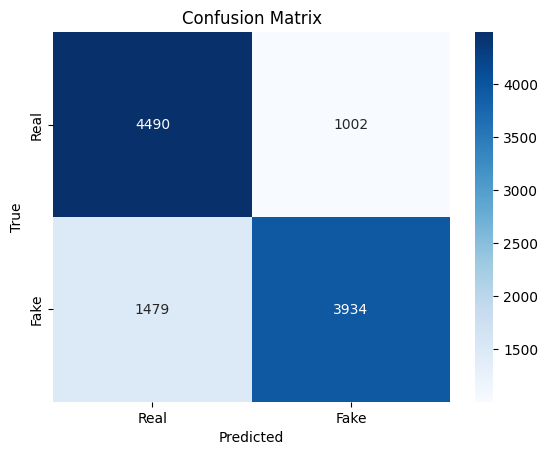


 Classification Report:

              precision    recall  f1-score   support

        Real       0.75      0.82      0.78      5492
        Fake       0.80      0.73      0.76      5413

    accuracy                           0.77     10905
   macro avg       0.77      0.77      0.77     10905
weighted avg       0.77      0.77      0.77     10905



In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc:.4f}")

# Optional: Show confusion matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_gen)
y_pred_classes = (y_pred > 0.5).astype(int)
y_true = test_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\n Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=['Real', 'Fake']))


In [ ]:
model.save("deepfake_classifier.h5")

In [ ]:
from google.colab import files
files.download("deepfake_classifier.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Loading saved model
model = load_model("deepfake_classifier.h5")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)  # Resize to match training input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, height, width, 3)
    img_array = img_array / 255.0  # Normalize (as done during training)

    prediction = model.predict(img_array)

    # Since you're using sigmoid and binary classification
    predicted_class = 'Fake' if prediction[0][0] > 0.5 else 'Real'

    print(f"Predicted class: {predicted_class} (Confidence: {prediction[0][0]:.4f})")


In [ ]:
#taking Input
img_path = input("Enter the image path: ")
predict_image(img_path)

Enter the image path: /content/drive/MyDrive/Divp images/tiger (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Predicted class: Real (Confidence: 0.4802)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#taking Input
img_path = input("Enter the image path: ")
predict_image(img_path)

Enter the image path: /content/drive/MyDrive/Divp images/fake_images (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Fake (Confidence: 0.8230)
